We start by simulating a perfect liner relationship, fit the regression

In [182]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True) 


a1 = 1
b1 = 3.3
x1 = np.random.uniform(0, 10, 1000)
y1 = a1 + b1*x1 



In [174]:
#plt.scatter(x1,y1)
#plt.show()
sns.scatterplot(x="Simulated x", y="Constructed Y", data1)

SyntaxError: positional argument follows keyword argument (<ipython-input-174-843e594c2e1d>, line 3)

In [84]:
model = sm.OLS(y1,x1).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.780e+06
Date:                Wed, 13 May 2020   Prob (F-statistic):                        0.00
Time:                        01:40:25   Log-Likelihood:                         -682.30
No. Observations:                1000   AIC:                                      1367.
Df Residuals:                     999   BIC:                                      1372.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We simulate 1000 obersvations from a normal distribution with mean 2 and std deviation 3. We also simulate an error component from a normal distribution with mean 0 and standard deviation 3. We use these simulated values to create a series of linear models to check and test regression assumptions

In [105]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
a2 = 1
b2 = 3.3
x2 = np.random.uniform(0, 10, 1000)
e2 = np.random.normal(0,3,1000)
y2 = a2 + b2*x2 + e2

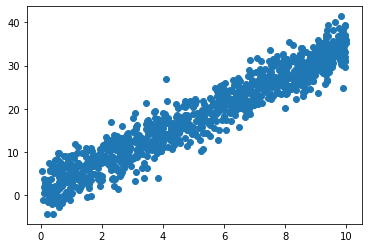

In [106]:
plt.scatter(x2,y2)
plt.show()


In [107]:
model2 = sm.OLS(y2,x2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.757e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):                        0.00
Time:                        01:56:26   Log-Likelihood:                         -2520.8
No. Observations:                1000   AIC:                                      5044.
Df Residuals:                     999   BIC:                                      5049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

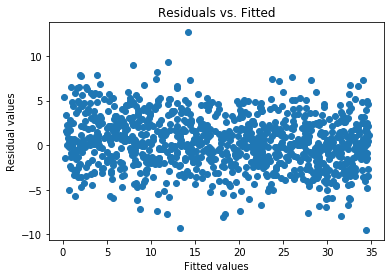

In [126]:
residuals2 = model2.resid
fitted2 = model2.fittedvalues
#ax.set_ylabel('Residuals')
#ax.set_xlabel('Fitted Values')
#ax.set_title('Residuals vs. Fitted')
plt.scatter(fitted2, residuals2)
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()

We will simulate the same model as the one above but with heteroskedastic error and see how if it affects the coefficients or confidence interval estimates. 

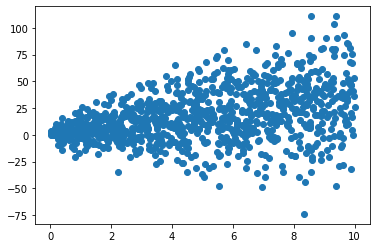

In [99]:
mean3 = 2
stdv3 = 3
a3 = 1
b3 = 3.3
x3 = np.random.uniform(0, 10, 1000)
e3 = np.random.normal(0,10*np.sqrt(x3),1000)
y3 = a3 + b3*x3 + e3
plt.scatter(x3,y3)
plt.show()

In [100]:
model1 = sm.OLS(y3,x3).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.424
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                              736.2
Date:                Wed, 13 May 2020   Prob (F-statistic):                   6.51e-122
Time:                        01:49:38   Log-Likelihood:                         -4541.8
No. Observations:                1000   AIC:                                      9086.
Df Residuals:                     999   BIC:                                      9090.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient of the regression with heteroskedastic errors is 3.44 which isn't different from the first and second model. In other words, the heteroskedasticy doesn't impact the coefficient estimate. The impact of the heteroskedasticity is on the on the confidence intervals around the mean estimate that increased from 3.41~3.47 to 3.17~3.66 